# MIT 801 - SL Exam

## Question 1

In [83]:
import numpy as np
import pandas as pd

In [84]:
import statsmodels.api as sm
from scipy.stats import linregress
import matplotlib.pyplot as plt
import seaborn as sns

In [85]:
from ISLP import load_data
from ISLP.models import (ModelSpec as MS, summarize , poly)

In [86]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

In [87]:
LDA_Data = pd.read_excel('LDAData.xlsx')

In [88]:
LDA_Data.head()

,gr,x1,x2
0,1,90.535,102.132
1,1,96.539,101.255
2,1,102.514,93.208
3,1,104.786,105.752
4,1,95.393,100.954


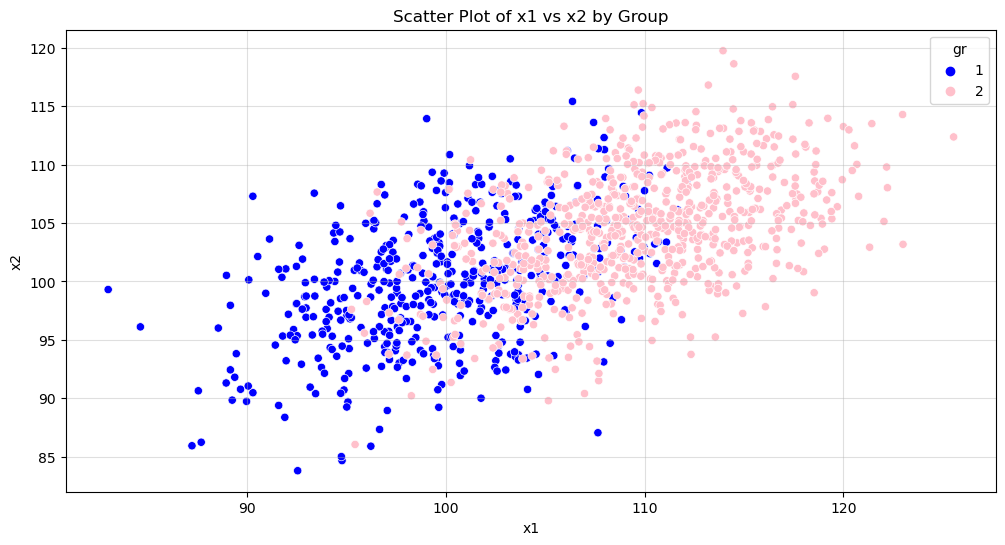

In [90]:
#Scatter Plot
plt.figure(figsize=(12, 6))
sns.scatterplot(data=LDA_Data, x='x1', y='x2', hue='gr', palette=['blue', 'pink'])

plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Scatter Plot of x1 vs x2 by Group')

# Show the plot
plt.grid(alpha=0.4) 
plt.show()

In [91]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler

X = LDA_Data[['x1', 'x2']]
y = LDA_Data['gr']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Create and fit LDA model
#n_components=1 for K=2
lda_model = LinearDiscriminantAnalysis(n_components=1, store_covariance = True) 
lda_model.fit(X_scaled, y)

LinearDiscriminantAnalysis(n_components=1, store_covariance=True)

In [92]:
#Get fitted parameters
means = lda_model.means_
cov = lda_model.covariance_
priors = lda_model.priors_

print("Fitted Means (μk):")
print(means)
print("\nFitted Covariance Matrix (Σ):")
print(cov)
print("\nFitted Prior Probabilities (πk):")
print(priors)

Fitted Means (μk):
[[-0.82499314 -0.48532664]
 [ 0.54999543  0.3235511 ]]

Fitted Covariance Matrix (Σ):
[[0.54625755 0.31794981]
 [0.31794981 0.84297203]]

Fitted Prior Probabilities (πk):
[0.4 0.6]


In [93]:
#Print model parameters
print("LDA Coefficients:", lda_model.coef_)
print("LDA Intercept:", lda_model.intercept_)

LDA Coefficients: [[2.50551486 0.01299635]]
LDA Intercept: [0.75102178]


In [94]:
#Display the model's parameters
print("Classes:", lda_model.classes_)
print("Priors:", lda_model.priors_)
print("Means:", lda_model.means_)
print("Scalings:", lda_model.scalings_)

Classes: [1 2]
Priors: [0.4 0.6]
Means: [[-0.82499314 -0.48532664]
 [ 0.54999543  0.3235511 ]]
Scalings: [[1.34783689]
 [0.00699136]]


In [95]:
#Predicions
y_pred = lda_model.predict(X_scaled)
#Calculate confusion matrix
conf_matrix = confusion_matrix(y, y_pred)

In [96]:
#Calculate sensitivity and specificity
tn, fp, fn, tp = conf_matrix.ravel()
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)

# Print results
print("Confusion Matrix:")
print(conf_matrix)
print(f"\nSensitivity: {sensitivity:.3f}")
print(f"Specificity: {specificity:.3f}")
print(f"\nAccuracy: {accuracy_score(y, y_pred):.3f}")

Confusion Matrix:
[[378 122]
 [101 649]]

Sensitivity: 0.865
Specificity: 0.756

Accuracy: 0.822


In [97]:
#Predict probabilities
y_prob = lda_model.predict_proba(X_scaled)
y_prob_adjusted = y_prob[:, 1:]

#Classify threshold of 0.5
y_pred_adjusted = (y_prob_adjusted > 0.5).astype(int) + 1  # Shift predictions by 1

#Calculate confusion matrix
conf_matrix = confusion_matrix(y, y_pred_adjusted)

#Caalculate sensitivity and specificity
tn, fp, fn, tp = conf_matrix.ravel()
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)

#Print results
print("Confusion Matrix:")
print(conf_matrix)
print(f"\nSensitivity: {sensitivity:.3f}")
print(f"Specificity: {specificity:.3f}")
print(f"\nAccuracy: {accuracy_score(y, y_pred_adjusted):.3f}")

Confusion Matrix:
[[378 122]
 [101 649]]

Sensitivity: 0.865
Specificity: 0.756

Accuracy: 0.822


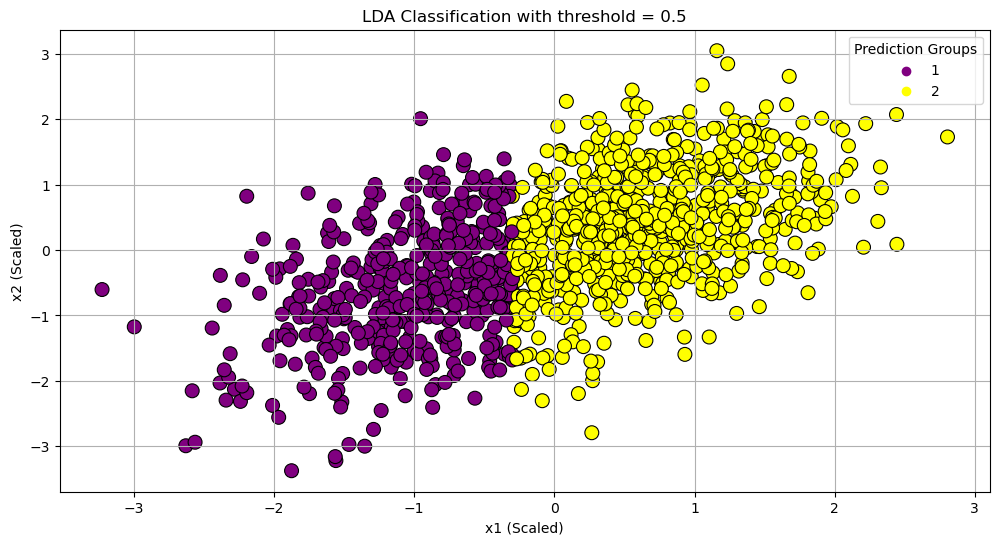

In [98]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x=X_scaled[:, 0].flatten(),  # Flatten to 1D
                y=X_scaled[:, 1].flatten(),  # Flatten to 1D
                hue=y_pred_adjusted.flatten(),  # Flatten to 1D
                palette=['purple', 'yellow'], s=100, edgecolor='k', legend='full')
plt.title('LDA Classification with threshold = 0.5')
plt.xlabel('x1 (Scaled)')
plt.ylabel('x2 (Scaled)')
plt.legend(title='Prediction Groups')
plt.grid(True)
plt.show()

In [99]:
y_prob

array([[0.9906505 , 0.0093495 ],
       [0.92634165, 0.07365835],
       [0.60527632, 0.39472368],
       ...,
       [0.028549  , 0.971451  ],
       [0.44836244, 0.55163756],
       [0.00426392, 0.99573608]])

In [100]:
y_prob = lda_model.predict_proba(X_scaled)
y_pred_adjusted_02 = y_prob[:, 1:] 

y_pred_adjusted_02 = (y_prob_adjusted > 0.2).astype(int) + 1 

#Calculate confusion matrix
conf_matrix = confusion_matrix(y, y_pred_adjusted_02)

#Calculate sensitivity and specificity
tn, fp, fn, tp = conf_matrix.ravel()
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)

#Print results
print("Confusion Matrix (Threshold = 0.2):")
print(conf_matrix)
print(f"\nSensitivity (Threshold = 0.2): {sensitivity:.3f}")
print(f"Specificity (Threshold = 0.2): {specificity:.3f}")
print(f"\nAccuracy (Threshold = 0.2): {accuracy_score(y, y_pred_adjusted_02):.3f}")

Confusion Matrix (Threshold = 0.2):
[[244 256]
 [ 25 725]]

Sensitivity (Threshold = 0.2): 0.967
Specificity (Threshold = 0.2): 0.488

Accuracy (Threshold = 0.2): 0.775


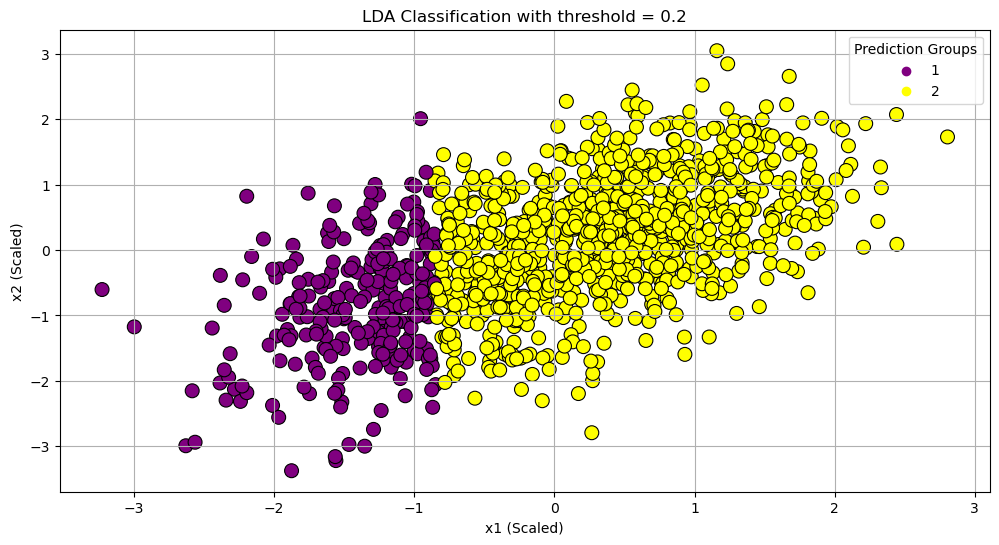

In [101]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x=X_scaled[:, 0].flatten(),  # Flatten to 1D
                y=X_scaled[:, 1].flatten(),  # Flatten to 1D
                hue=y_pred_adjusted_02.flatten(),  # Flatten to 1D
                palette=['purple', 'yellow'], s=100, edgecolor='k', legend='full')
plt.title('LDA Classification with threshold = 0.2')  # Update the title
plt.xlabel('x1 (Scaled)')
plt.ylabel('x2 (Scaled)')
plt.legend(title='Prediction Groups')
plt.grid(True)
plt.show()